In [24]:
import pandas as pd
import numpy as np
import config
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer
from sklearn.decomposition import FactorAnalysis, PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import Normalizer
from pipeline.training.data_manager import _X_feature_selector, _y_feature_selector
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv(f'{config.TRAINING_DATA_PATH}/dataset.csv')

In [25]:
X = data[_X_feature_selector(data)]
y = data[_y_feature_selector()]

In [4]:
# plt.hist(X['ctrl_per_min_mean_red'][~X['ctrl_per_min_mean_red'].isna()], bins=70)
# plt.show()

In [8]:
# imp = IterativeImputer(max_iter=10, random_state=77)
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imputed_X = imp.fit_transform(X)

In [ ]:
individual_fighter_off_cols = ['td_mean_red', 'td_per_min_mean_red', 'sub_att_per_min_mean_red', 'td_accuracy_mean_red', 'td_att_trend_mean_red', 
                               'td_trend_mean_red', 'ctrl_diff_mean_red', 'ctrl_mean_red', 'ctrl_per_min_mean_red', ]

['td_mean_red', 'td_diff_progression_red', 'ctrl_diff_progression_red', 'td_allowed_accuracy_mean_red', 'sub_att_trend_progression_red', 'td_per_min_mean_red', 'td_diff_mean_red', 'ctrl_trend_mean_red', 'sub_att_allowed_per_min_mean_red', 'td_att_per_min_progression_red', 'sub_att_per_min_mean_red', 'sub_att_trend_mean_red', 'td_allowed_trend_progression_red', 'td_att_allowed_per_min_mean_red', 'td_allowed_trend_mean_red', 'td_att_allowed_progression_red', 'td_allowed_per_min_mean_red', 'td_allowed_per_min_progression_red', 'sub_att_diff_progression_red', 'sub_att_allowed_mean_red', 'sub_att_per_min_progression_red', 'td_allowed_accuracy_progression_red', 'ctrl_allowed_per_min_mean_red', 'sub_att_allowed_trend_mean_red', 'ctrl_allowed_trend_mean_red', 'td_accuracy_mean_red', 'sub_att_allowed_progression_red', 'sub_att_progression_red', 'td_att_trend_mean_red', 'td_allowed_progression_red', 'td_att_allowed_per_min_progression_red', 'td_trend_mean_red', 'ctrl_progression_red', 'td_allowe

[Text(0.5, 1.0, 'UFC Fighters t-SNE Projection')]

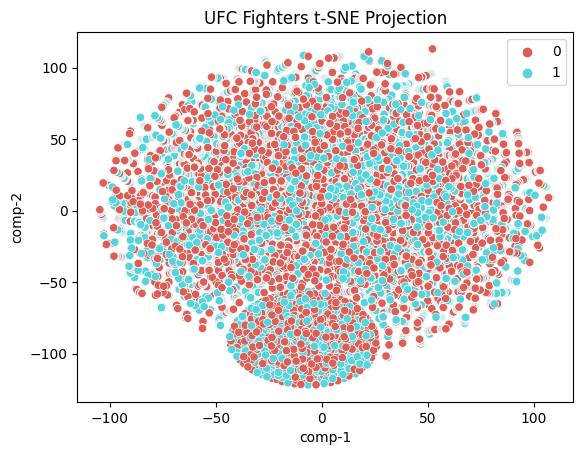

In [33]:
""" Do t-SNE on dataset """
individual_fighter_cols = list(filter(lambda x: 'ctrl' in x or 'sub' in x or 'td' in x, filter(lambda x: x.endswith('_red'), X.columns)))
print (individual_fighter_cols)
individual_fighter_data = X[individual_fighter_cols].apply(lambda x: (x - x.mean()) / x.std())
imputed_individual_fighter_data = imp.fit_transform(individual_fighter_data)

X_embedded = TSNE(n_components=2, learning_rate='auto', 
                  init='random', perplexity=3).fit_transform(imputed_individual_fighter_data)

tsne_df = pd.DataFrame()
tsne_df['y'] = y
tsne_df['comp-1'] = X_embedded[:,0]
tsne_df['comp-2'] = X_embedded[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=tsne_df.y.tolist(),
                palette=sns.color_palette("hls", 2),
                data=tsne_df).set(title="UFC Fighters t-SNE Projection")

In [6]:
""" Do principal component analysis on the dataset """
pca = PCA(n_components=10)
transformed_data = pca.fit_transform(imputed_X)
print (pca.get_feature_names_out)
# print (pca.explained_variance_)
# print (pca.explained_variance_ratio_)
# transformed_data.head()

AttributeError: 'PCA' object has no attribute 'feature_names_in_'